# Índices Educación Superior Periodo 2005-2023

## I. Introducción
La educación es uno de los pilares de la sociedad, y se ha visto afectada por diversas medidas e hitos como:

* Movilizaciones (2006, 2011)
* Implementación de ayudas económicas (Beca Vocación de Profesor, Gratuidad)
* Medidas de paridad
* Cambios en los sistemas de ingresos (PSU, PTU, PAES)

Se hace interesante comprender cómo afectaron estas medidas externas a la educación superior, por ejemplo en cantidad de matrículas de primer año y vacantes en cada carrera.
Se posee una base de datos histórica de educación superior que cuenta con registros entre 2005 y 2023.

## II. Exploración de datos

### Hito 1

Para un posterior preprocesamiento de los datos, se observan la cantidad de registros únicos y nulos en cada una de estas columnas.
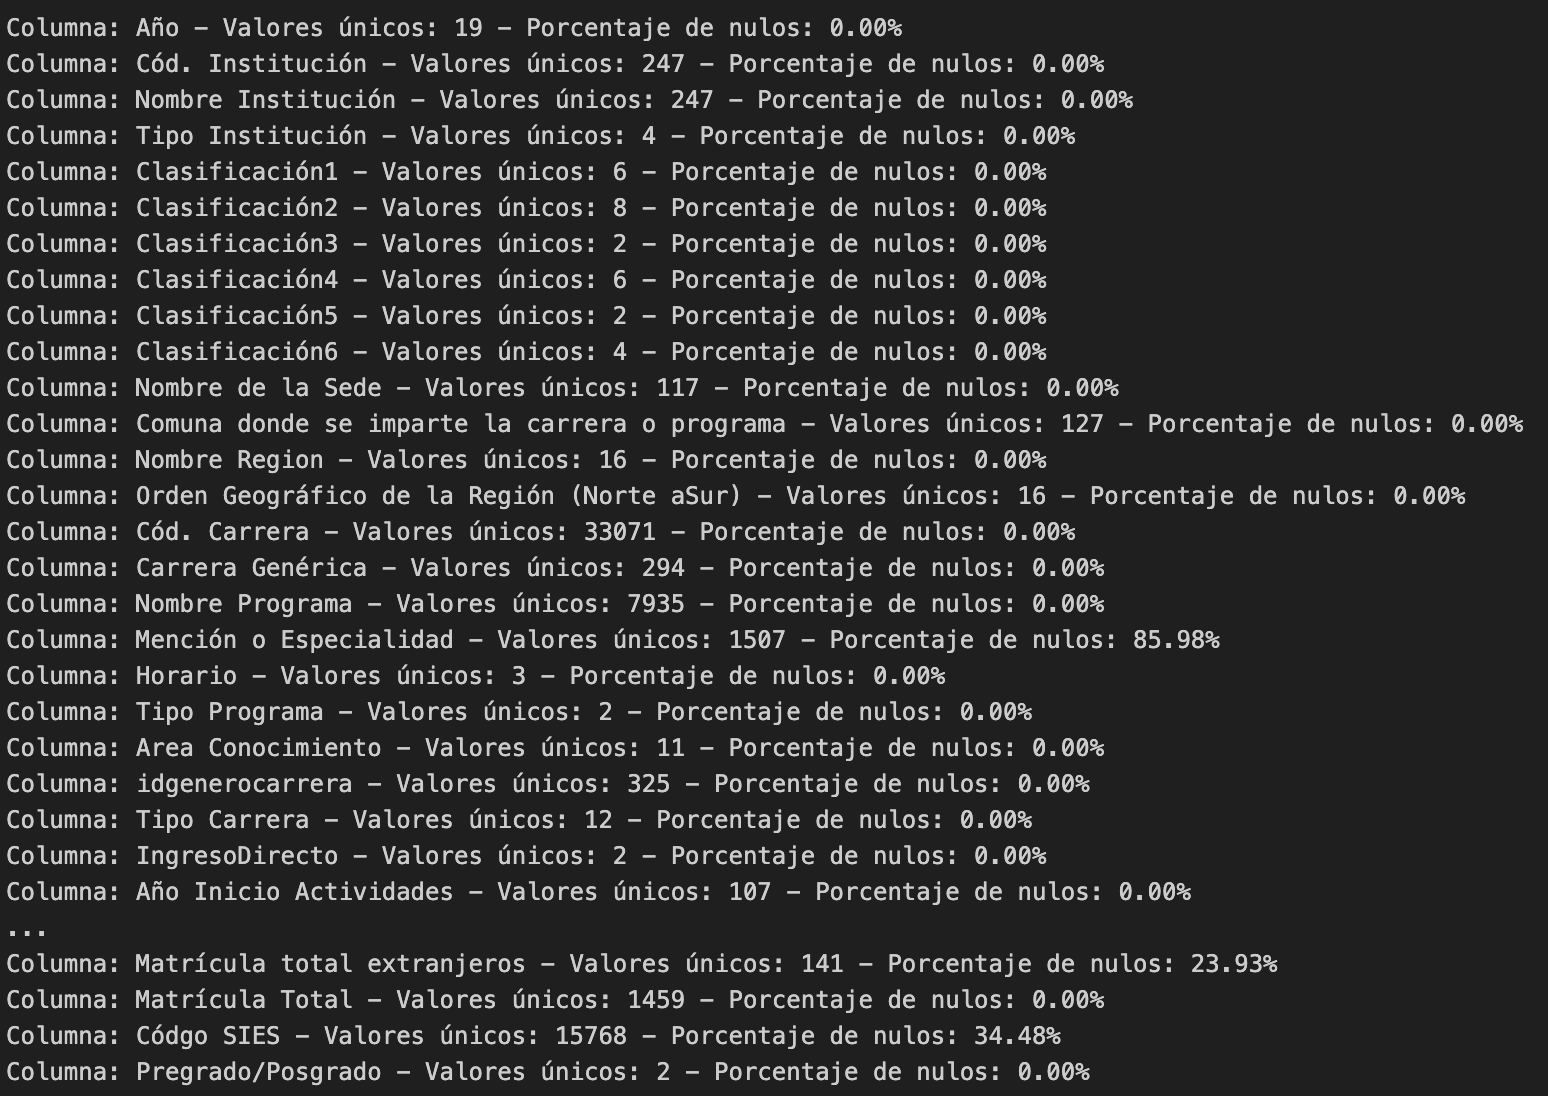

#### Distribuciones importantes

En primer lugar, se decide contabilizar el porcentaje de registros correspondientes a carreras de pregrado y postgrado, resultando en un 83.8% y 16.2% respectivamente.

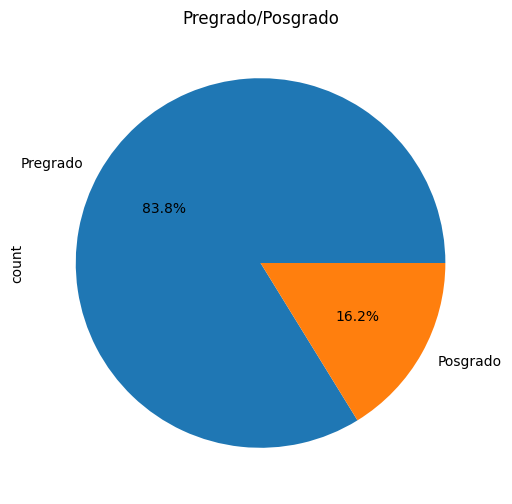

Por otra parte, la distribución de estudiantes por regiones es la siguiente:

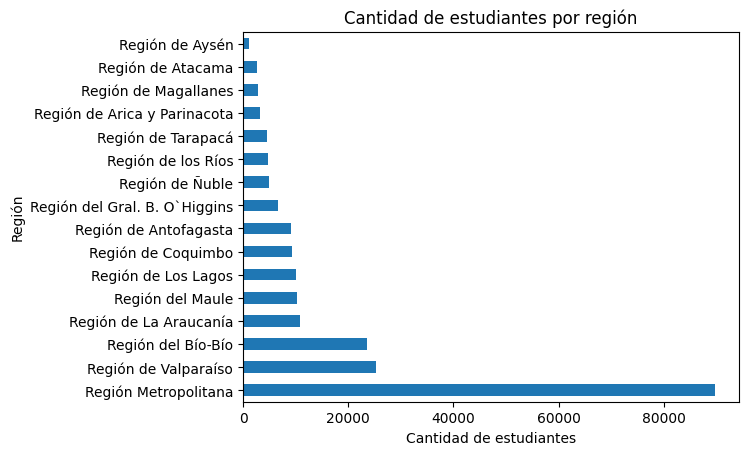

Aunque pudiese ser predecible, se evidencia una alta cantidad de estudiantes en la Región Metropolitana, seguida por Valparaíso y Biobío. 

En cuanto a la cantidad de estudiantes por tipo de carrera, se observa que la mayoría de los estudiantes se encuentran en carreras de tipo técnicas, seguidas por profesional con licenciatura y carreras profesionales.

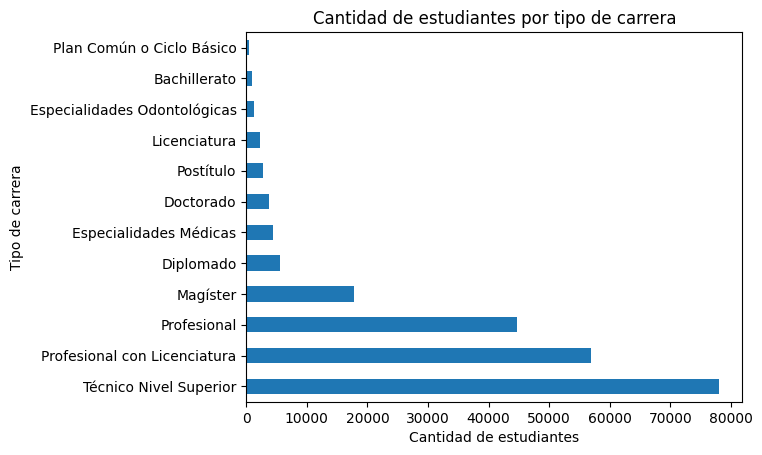

Agrupando las carreras por sector de conocimiento, se puede observar una gran presencia de estudiantes en carreras tecnológicas, seguidas por el área de administración y comercio. En tercer puesto, encontramos el área de salud que es casi equiparada por el área de educación.

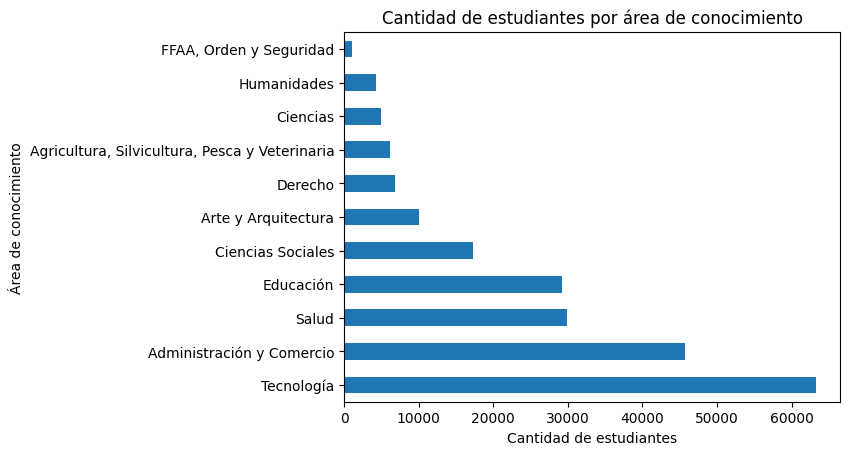

Por el lado de las estadísticas relacionadas al ingreso a estas carreras, primero tenemos el promedio del puntaje obtenido en las pruebas de matemáticas y lenguaje. 
Cabe mencionar que los resultados registrados entre los años 2005 y 2019 corresponden a la prueba de selección universitaria PSU, con un puntaje mínimo de 150 puntos y un máximo de 850 puntos. Los siguientes 3 años corresponden a resultados de la prueba de transición universitaria PTU, mientras que el último año registrado corresponde a la nueva prueba de acceso a la educación superior PAES, cuyo rango de puntajes va desde los 100 hasta los 1.000 puntos.

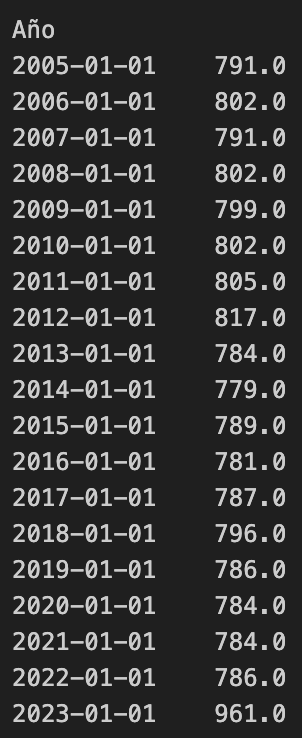

A continuación, se observa la distribución de los puntajes de matemáticas y lenguaje, donde se puede apreciar que en el caso de la PSU la mayoría de los estudiantes obtienen puntajes entre 400 y 700 puntos en ambas pruebas (recordar que la escala de cada una de las pruebas de la PSU estaba estandarizado, con una media de 500 puntos y una desviación estándar de 110).

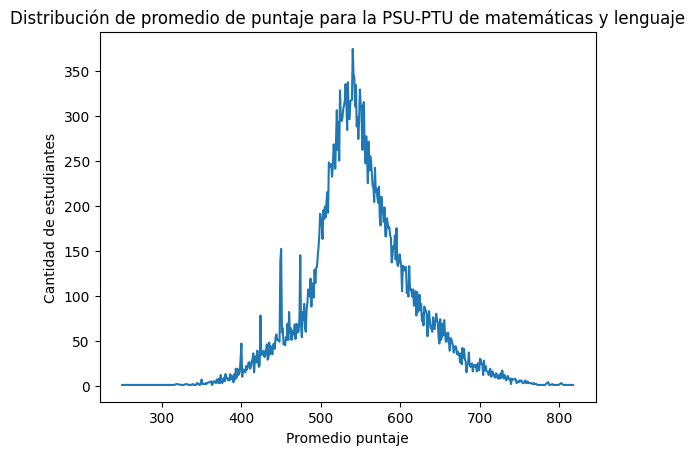
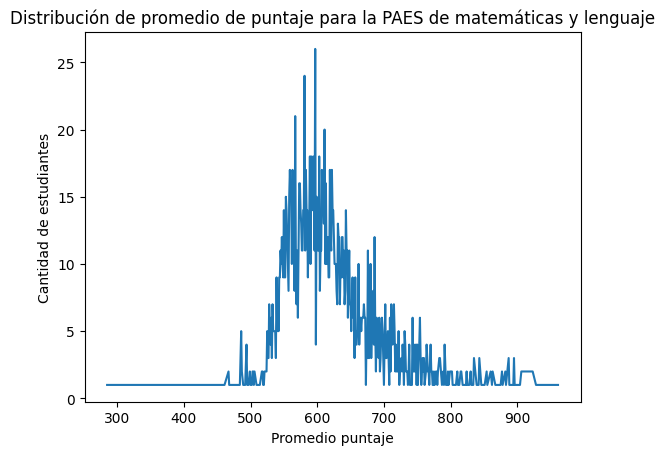

### Hito 2

- Hay 6 columnas llamadas "Clasificación X" con $X \in {1, 2, ... 6}$ de las cuales no se tiene mayor información. Dado que podrían ser categorías importantes, se analizan sus datos para determinar a qué corresponden.

  - Clasificación 2: Corresponde al tipo de universidad: si es CRUCH, Privada, Instituto. FFAA, etc.
  - Clasificación 1: Es una versión menos granular de la clasificación 2, por lo que se decide eliminarla.
  - Clasificación 3: Acreditación de la carrera (Acreditada, No Acreditada)
  - Clasificación 4: Si es una organización autónoma, cerrada, de supervisión, licenciamiento, etc.
  - Clasificación 5: Si está o no adscrita a gratuidad
  - Clasificación 6: Subsistema al que pertenece la carrera


In [3]:
# TODO: Rellenar
# Poner columnas:
# - Horario, Tipo Programa, Ingreso Directo, Tipo Moneda, Pregrado/Postgrado

## III. Preguntas de interés

Preguntas a que se podrían resolver usando la minería de datos:
1. ¿Es posible predecir el puntaje de corte esperado para el próximo año a partir de las tendencias históricas?
2. ¿Existen grupos con características comunes? ¿Se pueden agrupar instituciones que tienen perfiles similares de arancel y puntaje de corte? ¿Hay alguna otra característica que pueda relacionar instituciones?

Ambos puntos se podrían responder utilizando la minería de datos como herramienta. A partir del estudio inicial del dataset se cree que hay datos suficientes para responder las preguntas antes planteadas. Resulta interesante construir un predictor de puntajes de corte creado con datos reales, y no con simples estimaciones, o analizar el perfil de las instituciones de acuerdo a las características que se puedan extraer a partir de los atributos de la base de datos, ya que mediante simple análisis visual de las bases no siempre es directa la relación entre características de miles de datos disponibles.

## IV. Propuesta de Metodoloǵia Experimental

Considerando que nuestras preguntas pueden ser catalogadas en 2 categorías (predicción y clustering respectivamente) se propone las siguientes metodologías:

**Predicción:**
- Realizar preprocesamiento: Botar columnas irrelevantes, rellenar nulos, etc.
- Fijar una carrera/clase de carrera específica: Considerando la cantidad de carreras existentes, se propone fijar una carrera específica para realizar la predicción de puntaje de corte.
- Usar modelos de regresión para predecir el puntaje de corte anual: Se debe determinar qué tipo de regresión conviene usar en función de los datos: lineal, polinomial, etc.
- Evaluar el modelo y ver qué features son importantes

**Clustering:**
- Preprocesamiento: Análogo al anterior
- Determinar número óptimo de clusters
- Usar algoritmos de clustering: K-means, DBSCAN, etc.
- Reducción de dimensiones: Se puede usar PCA para reducir la dimensionalidad de los datos y así poder visualizarlos en 2D
- Evaluación y análisis: Se debe evaluar qué tan bien se agrupan los datos y analizar los grupos obtenidos para determinar si tienen sentido o no.



## V. Experimento Preliminar

Preliminarmente, se realiza el experimento de Clustering mencionado anteriormente, con el fin de determinar si es posible agrupar las carreras en base a sus características. Para esto, se realiza un preprocesamiento de los datos, donde se eliminan las columnas que no aportan información relevante para el análisis, se eliminan columnas con gran porcentaje de nulos y se eliminan los registros duplicados.

En primer lugar se decide botar estas columnas dado que no son relevantes o porque son redundantes:
      "Nombre de la Sede",
      "Orden Geográfico de la Región (Norte aSur)",
      "Mención o Especialidad",
      "idgenerocarrera",
      "Cód. Campus",
      "Cód. Sede",
      "Códgo SIES",

      "Máximo Puntaje (promedio matemáticas y lenguaje)",
      "Máximo Puntaje NEM",
      "Máximo Puntaje Ranking",

      "Mínimo Puntaje (promedio matemáticas y lenguaje)",
      "Mínimo Puntaje NEM",
      "Mínimo Puntaje Ranking",
        

Luego, para la columna "Tipo Moneda", los datos venían en formato string con problemas. Los valores posbiles son "Pesos" y "UF", pero los datos vienen en formatos diversos, conteniendo espacios, mayúsculas y minúsculas. Se realiza un preprocesamiento de esta columna para dejarla en un formato uniforme.

Luego se eliminan todas las columnas donde el porcentaje de nulos supera el 24%.

A continuación, se utiliza una herramienta de caracterización de datos que implementamos, la cual se encarga de:
- Transformar las variables categóricas para ser utilizadas en los algoritmos de clustering
- Eliminar columnas con alta correlación
- Obtener el número óptimo de clusters utilizando el método del codo (se obtienen 6)
- Aplicar KMeans con el número óptimo de clusters obtenido
- Aplciar PCA para reducir la dimensionalidad de los datos y poder visualizarlos en 2D

Se presentan algunas visualizaciones de los resultados obtenidos:

TODO: INSERTAR IMAGENES



De los resultados obtenidos, y analizando el dataframe resultante de nuestra pipeline, se puede observar que efectivamente se forman 6 clusters, sin embargo, no se logra distinguir una característica que agrupe a los clusters. Esto principalmente ya que el procesamiento usado en la pipeline multiplicó demasiado la cantidad de columnas (OneHotEncoding, etc). 

Por lo tanto, se propone realizar un nuevo preprocesamiento de los datos, eliminando aun más columnas y realizando un OneHotEncoding más restrictivo, para así poder obtener resultados más claros y explotables. Una forma de restringir la cantidad de columnas de forma considerale, sería de agrupas las categorías de las columnnas categóricas en grupos más grandes, por ejemplo, agrupar las carreras por área de conocimiento, etc. Y además de botar aquellas categorías que aparezcan muy poco y que provoquen que se generen demasiadas columnas.